<a href="https://colab.research.google.com/github/oailnivek/ML100-Days/blob/master/homework/Day_080_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [0]:
import os
import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.optimizers import SGD, RMSprop, Adagrad, Adam
import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preproc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [43]:
def build_mlp():
    """
    Build your own model
    """
    input_layer = Input(x_train.shape[1:], name='input_layer')
    x = Dense(units=132, activation='relu', name='hidden_layer_1')(input_layer)
    x = Dense(units=132, activation='relu', name='hidden_layer_2')(x)
    output_layer = Dense(units=10, activation='softmax', name='output_layer')(x)
    
    model = Model(inputs=[input_layer], outputs=[output_layer])
    
    return model

def model_summary():
    model = build_mlp()
    model.summary()

model_summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 3072)              0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 132)               405636    
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 132)               17556     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1330      
Total params: 424,522
Trainable params: 424,522
Non-trainable params: 0
_________________________________________________________________


In [0]:
## 超參數設定
"""
Set your required experiment parameters
"""
OPTIMIZER = [SGD, RMSprop, Adagrad, Adam]
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-5]
EPOCHS = [300]
BATCH_SIZE = [250]
MOMENTUM = [0.9]

In [0]:
cached = {}

class Test:
    def __init__(self, optimizer, lr, momentum, epochs, batch_size):
        keras.backend.clear_session()
        
        opt = {
            'lr': lr
        }
        if optimizer is SGD:
            opt['momentum'] = momentum
         
        self.model = build_mlp()
        self.optimizer = optimizer(**opt)
        self.fit_args = {
            'epochs': epochs,
            'batch_size': batch_size,
            'shuffle': True,
            'verbose': 0,
            'validation_split': 0.3
        }
        
        name = 'optimizer={}, lr={}, momentum={}, epochs={}, batch_size={}'\
            .format(optimizer.__name__, lr, momentum, epochs, batch_size)
        print(name)
        cached[name] = self
    
    def fit(self, input):
        x_train, y_train = input
        self.model.compile(
            loss='categorical_crossentropy',
            metrics=['accuracy'],
            optimizer=self.optimizer,
        )
        
        self.history = self.model.fit(x_train, y_train, **self.fit_args)
    
    def plot(self):
        """
        將實驗結果繪出
        """
        
        loss = self.history.history['loss']
        val_loss = self.history.history['val_loss']
        acc = self.history.history['acc']
        val_acc = self.history.history['val_acc']
        
        fig, ax = plt.subplots(1, 2, figsize=(13, 4))
        
        ax[0].plot(loss, label='train')
        ax[0].plot(val_loss, label='test')
        ax[0].set_ylabel('Loss')
        ax[0].set_xlabel('Epochs')
        ax[0].set_title('Loss')
        ax[0].legend()

        ax[1].plot(acc, label='train')
        ax[1].plot(val_acc, label='test')
        ax[1].set_ylabel('Accuracy')
        ax[1].set_xlabel('Epochs')
        ax[1].set_title('Accuracy')
        ax[1].legend()
        
        plt.show()
        

optimizer=SGD, lr=0.1, momentum=0.9, epochs=300, batch_size=250


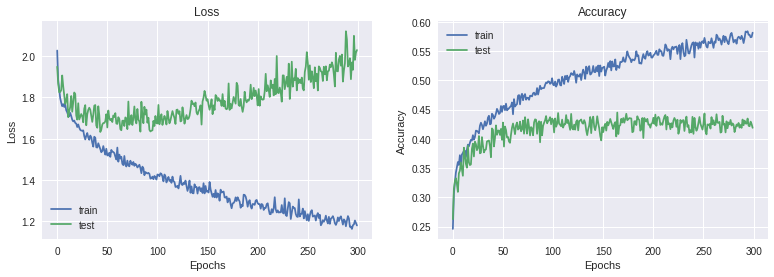

optimizer=SGD, lr=0.01, momentum=0.9, epochs=300, batch_size=250


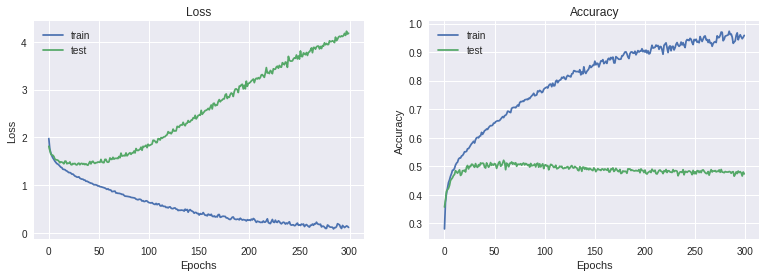

optimizer=SGD, lr=0.001, momentum=0.9, epochs=300, batch_size=250


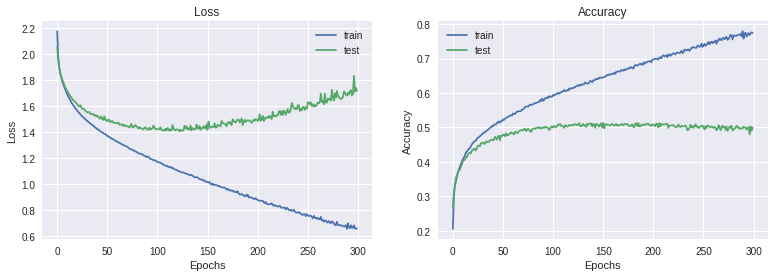

optimizer=SGD, lr=1e-05, momentum=0.9, epochs=300, batch_size=250


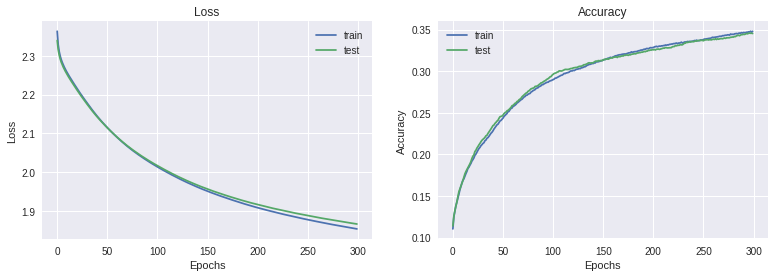

optimizer=RMSprop, lr=0.1, momentum=0.9, epochs=300, batch_size=250


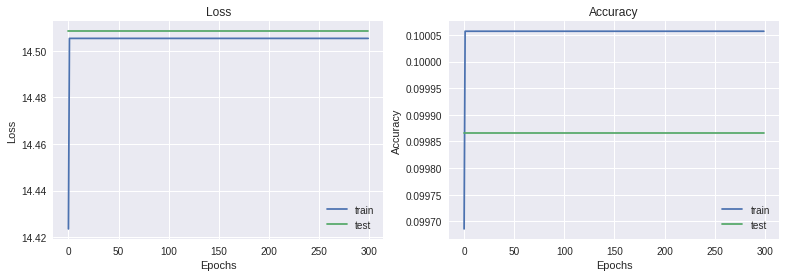

optimizer=RMSprop, lr=0.01, momentum=0.9, epochs=300, batch_size=250


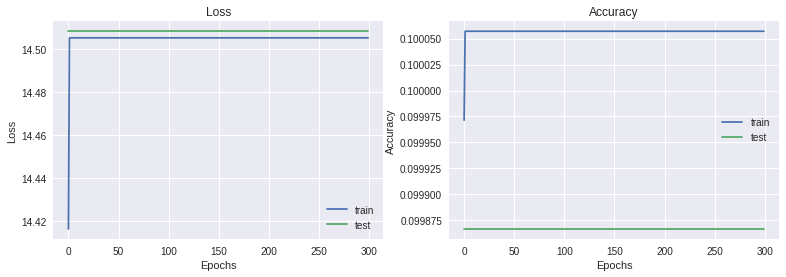

optimizer=RMSprop, lr=0.001, momentum=0.9, epochs=300, batch_size=250


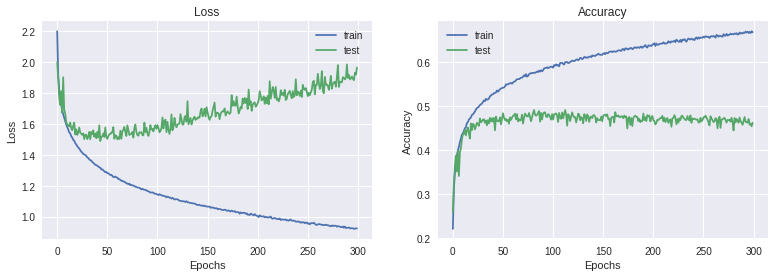

optimizer=RMSprop, lr=1e-05, momentum=0.9, epochs=300, batch_size=250


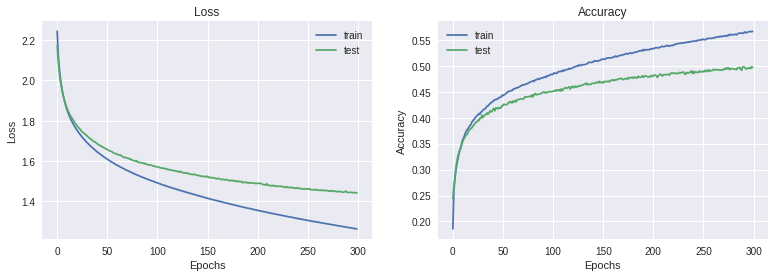

optimizer=Adagrad, lr=0.1, momentum=0.9, epochs=300, batch_size=250


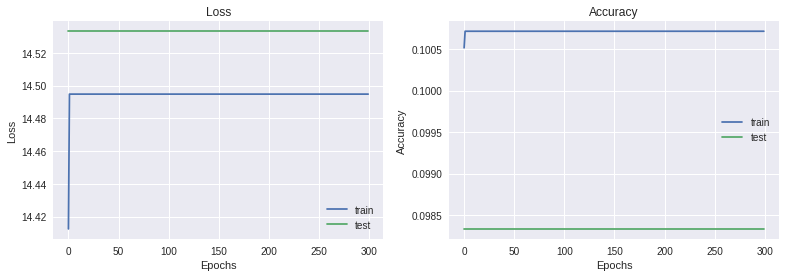

optimizer=Adagrad, lr=0.01, momentum=0.9, epochs=300, batch_size=250


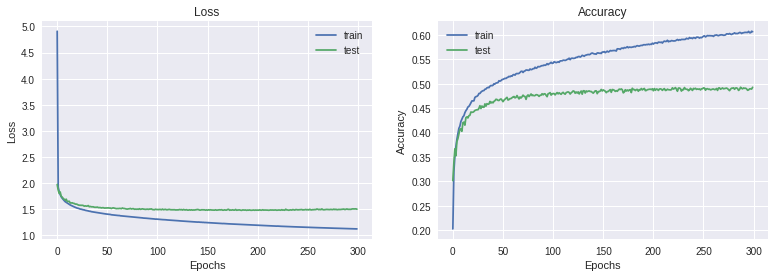

optimizer=Adagrad, lr=0.001, momentum=0.9, epochs=300, batch_size=250


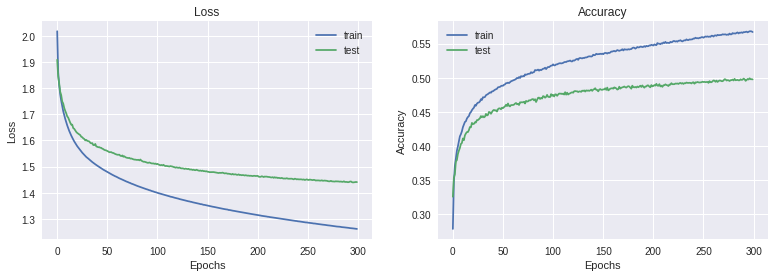

optimizer=Adagrad, lr=1e-05, momentum=0.9, epochs=300, batch_size=250


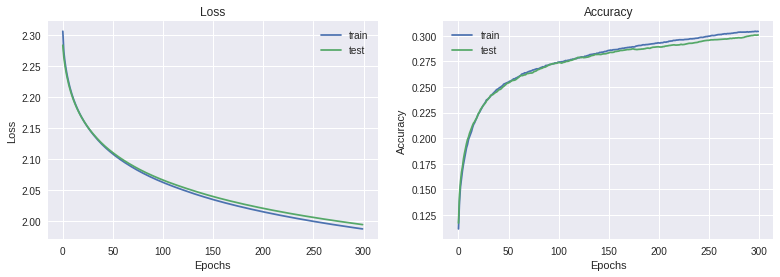

optimizer=Adam, lr=0.1, momentum=0.9, epochs=300, batch_size=250


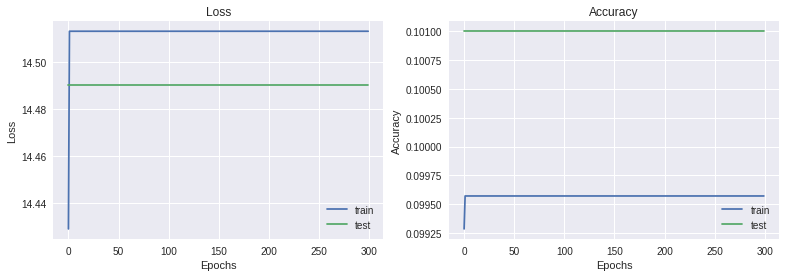

optimizer=Adam, lr=0.01, momentum=0.9, epochs=300, batch_size=250


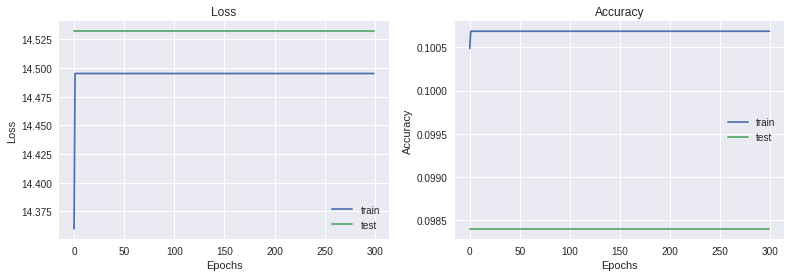

optimizer=Adam, lr=0.001, momentum=0.9, epochs=300, batch_size=250


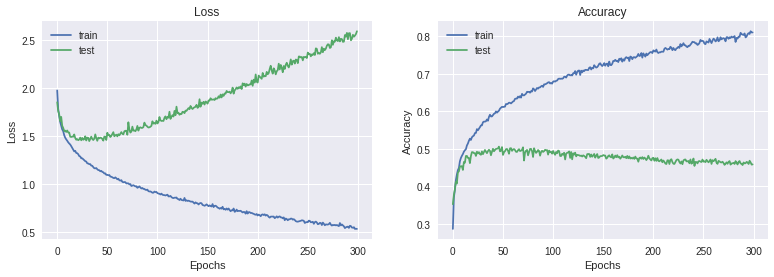

optimizer=Adam, lr=1e-05, momentum=0.9, epochs=300, batch_size=250


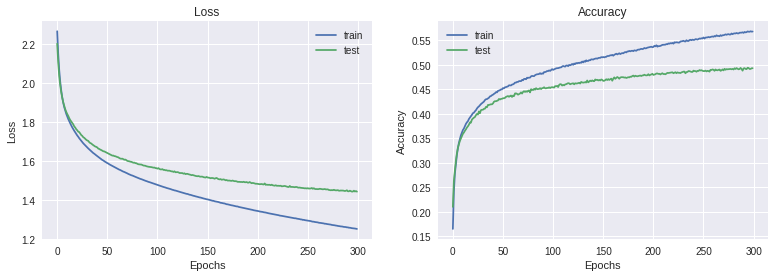

In [50]:
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for optimizer in OPTIMIZER:
    for lr in LEARNING_RATE:
        for epochs in EPOCHS:
            for batch_size in BATCH_SIZE:
                for momentum in MOMENTUM:
                    
                    test = Test(
                        optimizer=optimizer,
                        lr=lr,
                        momentum=momentum,
                        epochs=epochs,
                        batch_size=batch_size
                    )
                    
                    test.fit((x_train, y_train))
                    test.plot()